## Initial Grid Search

In [1]:
from utilities import *
from plot_utilities import *

np.random.seed(42)

In [2]:
# Note that the code below assumes you are in the "testing-framework" directory. Can check Current Working Directory below:
# Should be testing-framework
os.getcwd()
# os.chdir

'c:\\Users\\yashd\\Desktop\\hierarchical-bayesian-model-validation\\testing-framework'

In [3]:
''' Only need to run commented code once '''
# data_dict = pd.read_pickle('../data/Panoptic Agriculture/Transformed Dataset/Panoptic_Data_Dict_Normalized.pickle')
# obs_x_dict = dict()
# for layer in np.arange(2, 9):
#     obs_x_dict[layer] = create_obs_x(data_dict, layer)
# pd.to_pickle(obs_x_dict, 'panoptic/obs_x_dict.pickle')

obs_x_dict = pd.read_pickle('panoptic/obs_x_dict.pickle') # Already sorted
obs_x_dict

{2: array([-99.93568594, -91.00645124, -88.54430615, ...,  88.80035968,
         91.52850405,  94.44944672]),
 3: array([-76.13432886, -63.02074639, -60.52416619, ...,  65.19608846,
         65.26965934,  69.44498554]),
 4: array([-51.73647153, -48.46756551, -45.83266202, ...,  48.25087164,
         50.33643736,  64.88734264]),
 5: array([-47.95678457, -43.34915759, -36.2290875 , ...,  36.11999915,
         38.35812055,  42.17747737]),
 6: array([-23.87540781, -23.66829959, -23.29668418, ...,  25.41955052,
         31.52717851,  44.79754701]),
 7: array([-19.12997336, -18.52962064, -17.2224645 , ...,  16.63923718,
         17.96650462,  20.30569957]),
 8: array([-18.71256003, -17.84609759, -16.94317757, ...,  15.43083627,
         16.78232461,  20.5891778 ])}

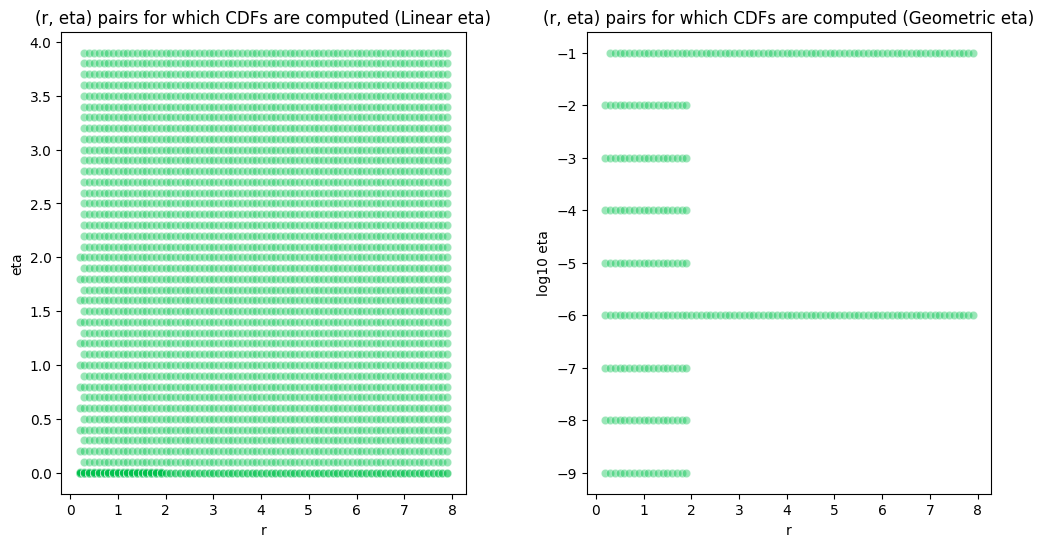

In [4]:
# Large grid search CDFs already computed (r = 0 to 8, eta = 0 to 3.9)
all_cdfs = combine_pickles('scipy_10000') | combine_pickles('mtlb_10000') 
all_cdfs_df = pd.DataFrame({'(r,eta),cdf' : sorted(all_cdfs.items())})
all_cdfs_df['r'] = pd.Series(all_cdfs_df["(r,eta),cdf"].str[0].str[0])
all_cdfs_df['eta'] = pd.Series(all_cdfs_df["(r,eta),cdf"].str[0].str[1])
all_cdfs_df['cdf'] = pd.Series(all_cdfs_df["(r,eta),cdf"].str[1])

create_scatter_plots_log_eta(all_cdfs_df)

In [5]:
''' Only need to run commented code once'''
# master_df = pd.DataFrame(columns = ['layer', 'num_samples', 'initial_param', 'kstest_stat_initial', 'best_param_eta_0', 'kstest_stat_eta0'])
# idx_eta0 = [i for i, param in enumerate(sorted(all_cdfs)) if np.isclose(param[1], 0, atol = 1e-40)]
# sorted_params = sorted(all_cdfs)
# for i, layer in enumerate(np.arange(2, 9)):
#     sample = obs_x_dict[layer]
#     ksstats, initial_param, min_stat = gridsearch(sample, all_cdfs)
#     ksstats_eta0 = [ksstats[i] for i in idx_eta0]
#     idx_min_ksstats_eta0 = idx_eta0[np.argmin(ksstats_eta0)]
#     master_df.loc[i, :] = [layer, sample.size, initial_param, min_stat, sorted_params[idx_min_ksstats_eta0], ksstats[idx_min_ksstats_eta0]]
# master_df = master_df.set_index('layer')
# master_df.to_csv(f'panoptic/CSVs/initial_eta0_grid.csv')

master_df = pd.read_csv(f'panoptic/CSVs/initial_eta0_grid.csv', index_col='layer')
master_df['initial_param'] = [tuple(float(i) for i in master_df.loc[layer]['initial_param'][1:-1].split(',')) for layer in master_df.index]
master_df

,num_samples,initial_param,kstest_stat_initial,best_param_eta_0,kstest_stat_eta_0
layer,,,,,
2,3180,"(0.6, 3.2)",0.038340,"(0.4, 0)",0.102709
3,12720,"(0.7, 3.5)",0.020230,"(0.4, 0)",0.106739
4,50880,"(0.8, 3.0)",0.011666,"(0.5, 0)",0.061078
5,203520,"(0.9, 1.6)",0.003225,"(0.6, 0)",0.040301
6,814080,"(1.1, 0.5)",0.006844,"(0.9, 0)",0.014370
7,3256320,"(4.6, 0.0)",0.024895,"(4.6, 0)",0.024895
8,13025280,"(5.7, 0.0)",0.171259,"(5.7, 0)",0.171259


In [9]:
whole_mins, whole_maxs, tail_mins, tail_maxs = [], [], [], []
wholes, tails = [], []
tail_cutoff = 10
for layer in np.arange(2, 9):
    # Ratio = Empirical / Computed
    whole, tail = compute_ksratio(obs_x_dict[layer], all_cdfs[master_df.loc[layer, 'initial_param']], tail_cutoff=tail_cutoff)
    wholes.append(whole)
    tails.append(tail)

master_df['kstest_ratio'] = wholes
master_df[f'kstest_ratio_tail{tail_cutoff}'] = tails
 
master_df

,num_samples,initial_param,kstest_stat_initial,best_param_eta_0,kstest_stat_eta_0,kstest_ratio,kstest_ratio_tail10
layer,,,,,,,
2,3180,"(0.6, 3.2)",0.038340,"(0.4, 0)",0.102709,"(0.96676, 43.125)","(0.98413, 1.0539)"
3,12720,"(0.7, 3.5)",0.020230,"(0.4, 0)",0.106739,"(0.93095, 37.103)","(0.93095, 1.0308)"
4,50880,"(0.8, 3.0)",0.011666,"(0.5, 0)",0.061078,"(0.98956, 28.251)","(0.98956, 1.0516)"
5,203520,"(0.9, 1.6)",0.003225,"(0.6, 0)",0.040301,"(0.00019138, 5.7351)","(0.99144, 1.1354)"
6,814080,"(1.1, 0.5)",0.006844,"(0.9, 0)",0.014370,"(1.3652e-05, 1.4185)","(0.94049, 1.2897)"
7,3256320,"(4.6, 0.0)",0.024895,"(4.6, 0)",0.024895,"(5.2307e-10, 1.0848)","(5.2307e-10, 1.0848)"
8,13025280,"(5.7, 0.0)",0.171259,"(5.7, 0)",0.171259,"(2.4364e-08, 5.0372)","(2.4364e-08, 5.0372)"


Best parameters (0.6, 3.2) with KS-test Statistic 0.0383 and pvalue 0.0001693037457256742, layer 2 with num_samples=3180


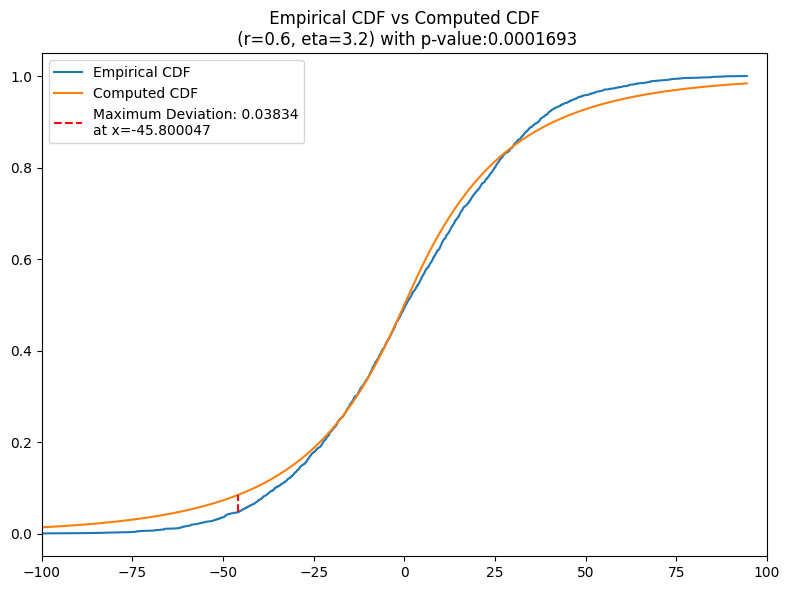

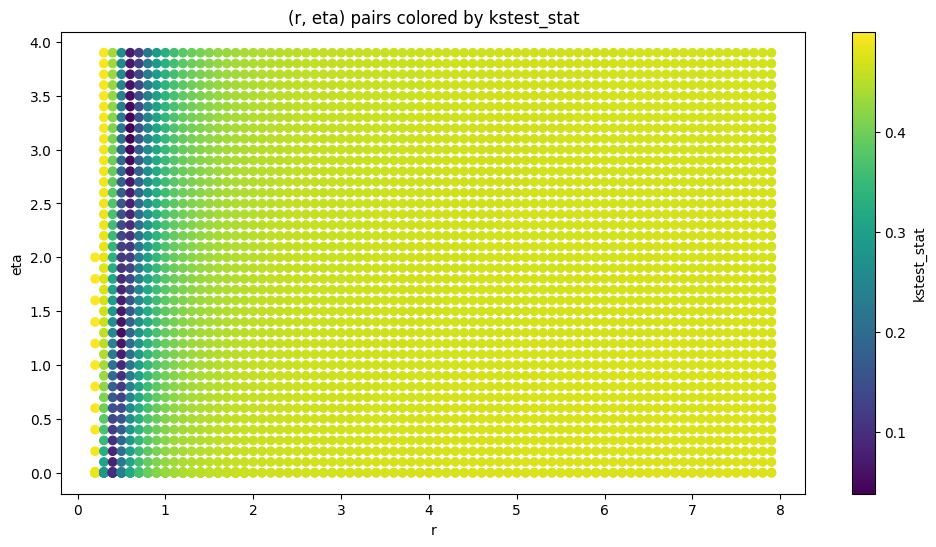

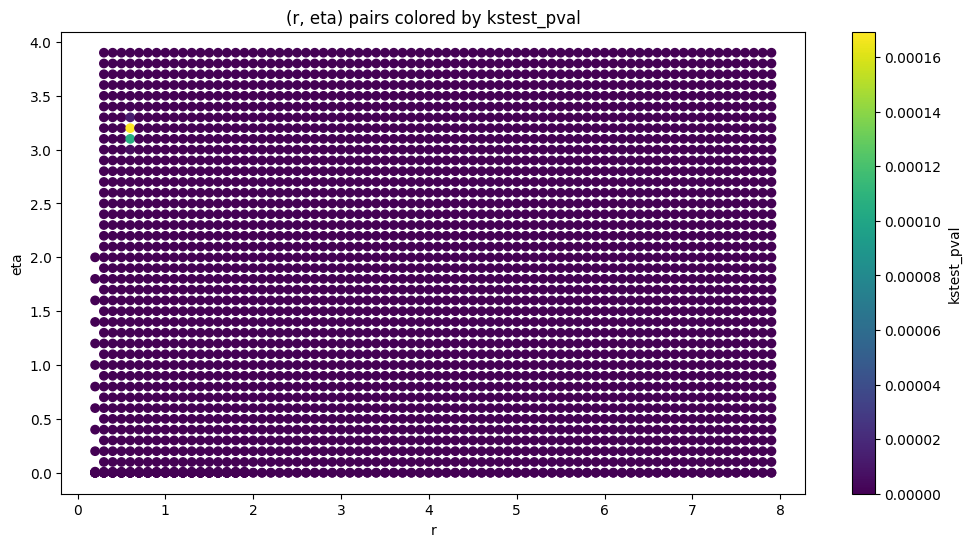

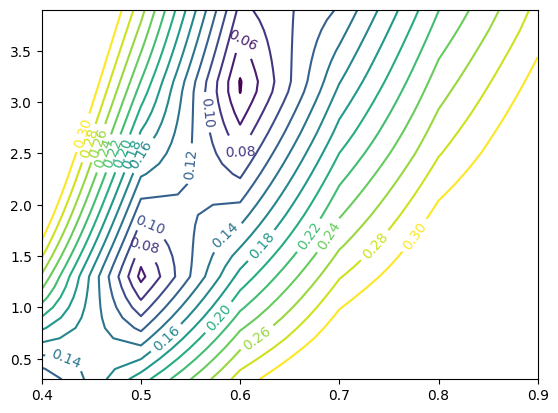

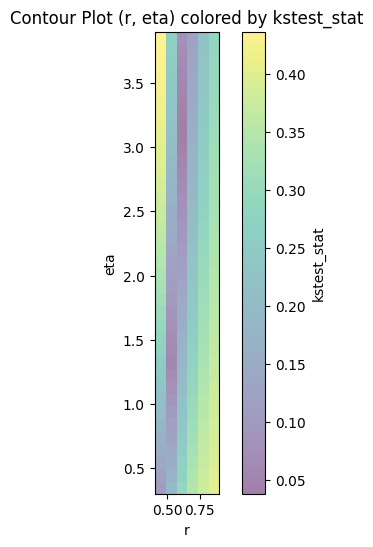

In [10]:
# Experimental cell displaying some plots

layer = 2
obs_x = obs_x_dict[layer]
all_ksstats, initial_param, min_stat = gridsearch(obs_x, all_cdfs)
df = all_cdfs_df.copy()
total_samples = obs_x.size
df['kstest_stat'] = all_ksstats
df['kstest_pval'] = stats.kstwo(n=total_samples).sf(all_ksstats)
print(f"Best parameters {(initial_param)} with KS-test Statistic {np.round(min_stat, 4)} and pvalue {stats.kstwo(n=total_samples).sf(min_stat)}, layer {layer} with num_samples={total_samples}")
visualize_cdf(obs_x, params = initial_param, n_samples=10000, all_cdfs = all_cdfs, interval = (-100, 100))
create_scatter_plot(df, 'kstest_stat')
create_scatter_plot(df, 'kstest_pval')

df0 = df[(df['r'] > 0.3) & (df['eta'] >= 0.3) & (df['r'] < 1)]
indices = df0.index
x = np.array(df0['r'].loc[indices])
y = np.array(df0['eta'].loc[indices])
z = np.array(df0['kstest_stat'].loc[indices]) 
X, Y = np.meshgrid(df0['r'].unique(), df0['eta'].unique())

dims_r = df0['r'].unique().size
dims_eta = df0['eta'].unique().size
fig, ax = plt.subplots()
CS = ax.contour(x.reshape(dims_r, dims_eta), y.reshape(dims_r, dims_eta), z.reshape(dims_r, dims_eta), np.append(np.arange(0.04, 0.3, 0.02), 0.3), cmap =  'viridis')
ax.clabel(CS, CS.levels, inline=True, fontsize=10)
create_contour_plot(df0,'kstest_stat')

In [11]:
# Given that pvalue = 0.05 and I have n samples, what should the kstest statistic be?
# Note how as num_samples increases by a factor of 4, the cutoff decreases by a factor of 2
# Could potentially include the plot in `images/loglog_pvalue_numsamples.png` 

for layer in np.arange(2, 9):
    num_points = obs_x_dict[layer].size
    master_df.loc[layer, 'kstest_stat_cutoff_0.05'] = stats.kstwo(n=num_points).isf(0.05)    
master_df

,num_samples,initial_param,kstest_stat_initial,best_param_eta_0,kstest_stat_eta_0,kstest_ratio,kstest_ratio_tail10,kstest_stat_cutoff_0.05
layer,,,,,,,,
2,3180,"(0.6, 3.2)",0.038340,"(0.4, 0)",0.102709,"(0.96676, 43.125)","(0.98413, 1.0539)",0.024030
3,12720,"(0.7, 3.5)",0.020230,"(0.4, 0)",0.106739,"(0.93095, 37.103)","(0.93095, 1.0308)",0.012029
4,50880,"(0.8, 3.0)",0.011666,"(0.5, 0)",0.061078,"(0.98956, 28.251)","(0.98956, 1.0516)",0.006018
5,203520,"(0.9, 1.6)",0.003225,"(0.6, 0)",0.040301,"(0.00019138, 5.7351)","(0.99144, 1.1354)",0.003010
6,814080,"(1.1, 0.5)",0.006844,"(0.9, 0)",0.014370,"(1.3652e-05, 1.4185)","(0.94049, 1.2897)",0.001505
7,3256320,"(4.6, 0.0)",0.024895,"(4.6, 0)",0.024895,"(5.2307e-10, 1.0848)","(5.2307e-10, 1.0848)",0.000753
8,13025280,"(5.7, 0.0)",0.171259,"(5.7, 0)",0.171259,"(2.4364e-08, 5.0372)","(2.4364e-08, 5.0372)",0.000376


In [8]:
r_d, eta_d = 4, 2 # Controls precision to which parameters are optimized

# for layer in np.arange(8, 9): 
#     sample = obs_x_dict[layer]
#     initial_param = master_df.loc[layer, 'initial_param']
#     master_df.loc[layer, f'best_r_d{r_d}'], master_df.loc[layer, f'best_eta_d{eta_d}'] = coord_descent_gengamma(sample, initial_param, r_depth = r_d, eta_depth=eta_d, layer=layer)
#     master_df.loc[layer, 'kstest_stat_cd'] = compute_ksstat(sample, combine_pickles(f'layer{layer}_10000')[(master_df.loc[layer, f'best_r_d{r_d}'], master_df.loc[layer, f'best_eta_d{eta_d}'])])
#     print(f"Layer {layer} best parameters: {master_df.loc[layer, 'kstest_stat_cd']}")

# master_df['n_pval_0.05'] = master_df.apply(lambda row : find_n_fixed_pval_stat(row.loc['kstest_stat_cd'], row.loc['num_samples']), axis = 1)    
# master_df[['num_samples', 'initial_param', 'kstest_stat_initial', f'best_r_d{r_d}', f'best_eta_d{eta_d}', 'kstest_stat_cd', 'n_pval_0.05']].to_csv(f'panoptic/CSVs/optimized_params.csv')

master_df = pd.read_csv('panoptic/CSVs/master_df_post_optimize.csv', index_col = 'layer')
master_df['initial_param'] = [tuple(float(i) for i in master_df.loc[layer]['initial_param'][1:-1].split(',')) for layer in master_df.index]
master_df

,num_samples,initial_param,kstest_stat_initial,best_param_eta_0,kstest_stat_eta_0,kstest_stat_cutoff_0.05,best_r_d3,best_eta_d2,kstest_stat_cd,n_pval_0.05,best_r_d4
layer,,,,,,,,,,,
2,3180,"(0.6, 3.2)",0.038340,"(0.4, 0)",0.102709,0.024030,0.602,3.20,0.036033,1341,0.6020
3,12720,"(0.7, 3.5)",0.020230,"(0.4, 0)",0.106739,0.012029,0.705,3.60,0.019689,4770,0.7048
4,50880,"(0.8, 3.0)",0.011666,"(0.5, 0)",0.061078,0.006018,0.803,3.00,0.010263,16098,0.8026
5,203520,"(0.9, 1.6)",0.003225,"(0.6, 0)",0.040301,0.003010,0.901,1.60,0.003025,203520,0.9011
6,814080,"(1.1, 0.5)",0.006844,"(0.9, 0)",0.014370,0.001505,1.030,0.33,0.003651,128142,1.0280
7,3256320,"(4.6, 0.0)",0.024895,"(4.6, 0)",0.024895,0.000753,4.630,0.00,0.024877,3016,4.6290
8,13025280,"(5.7, 0.0)",0.171259,"(5.7, 0)",0.171259,0.000376,5.700,0.00,0.171259,60,5.7010


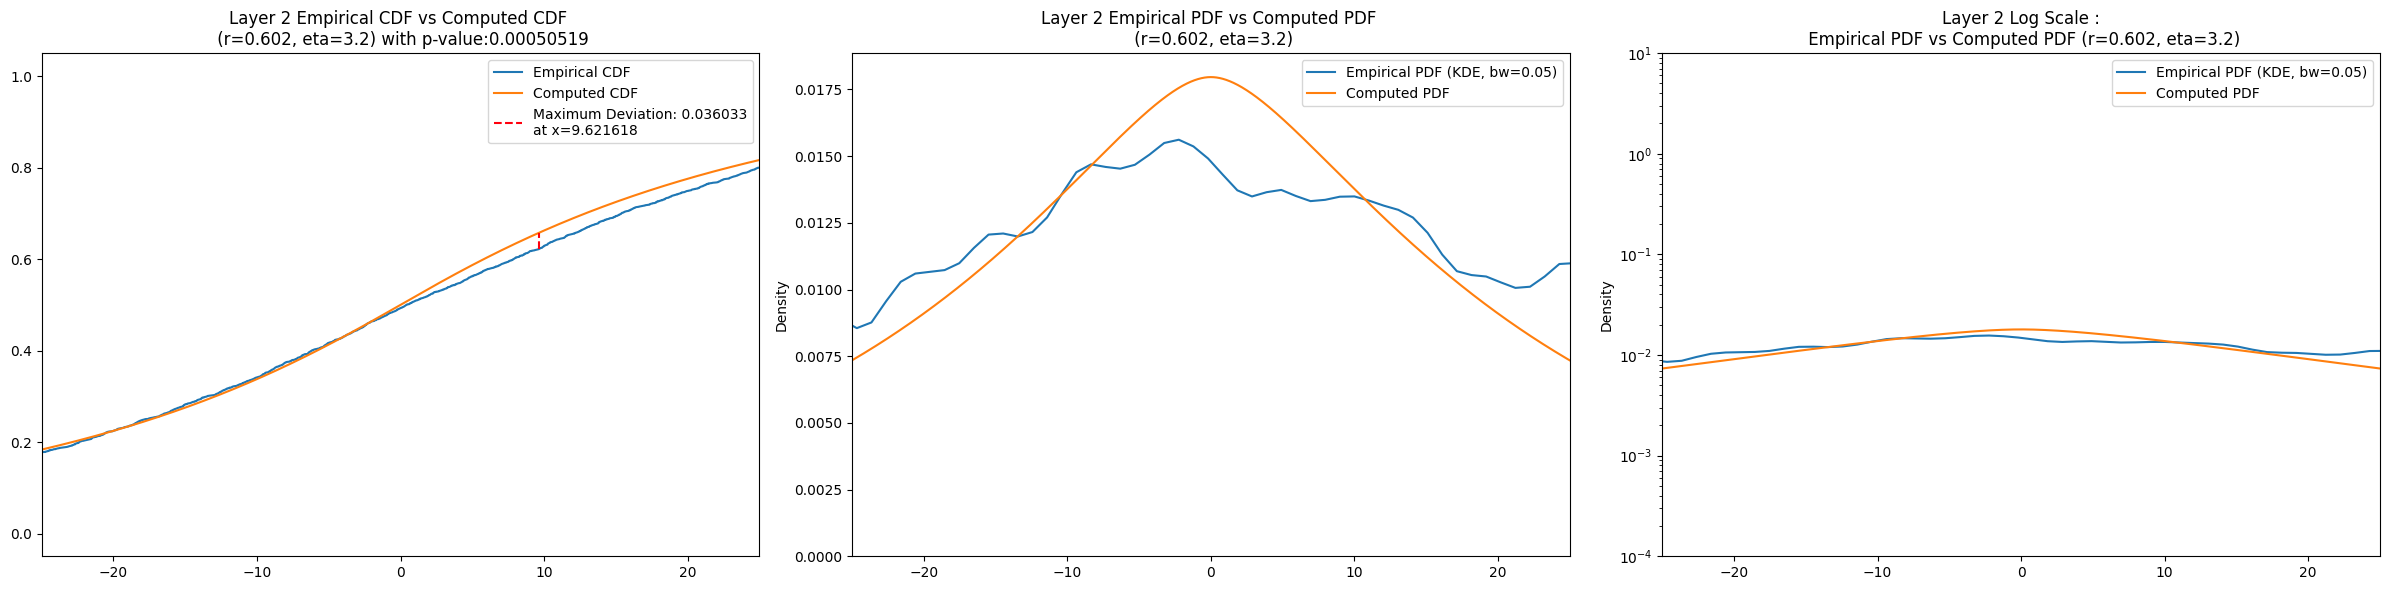

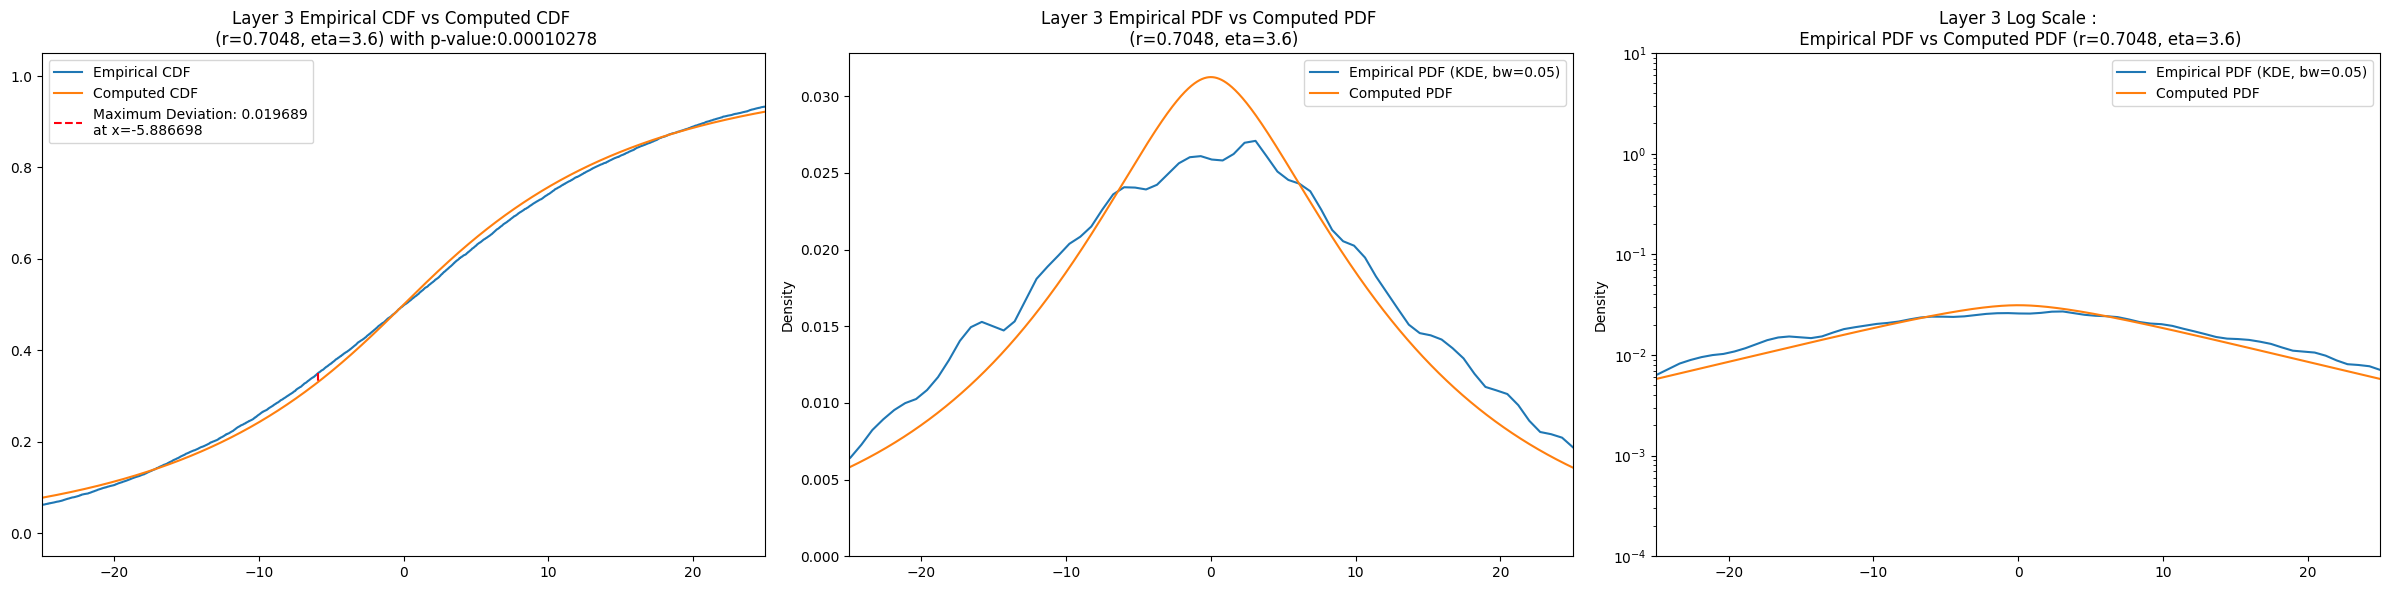

No Tail


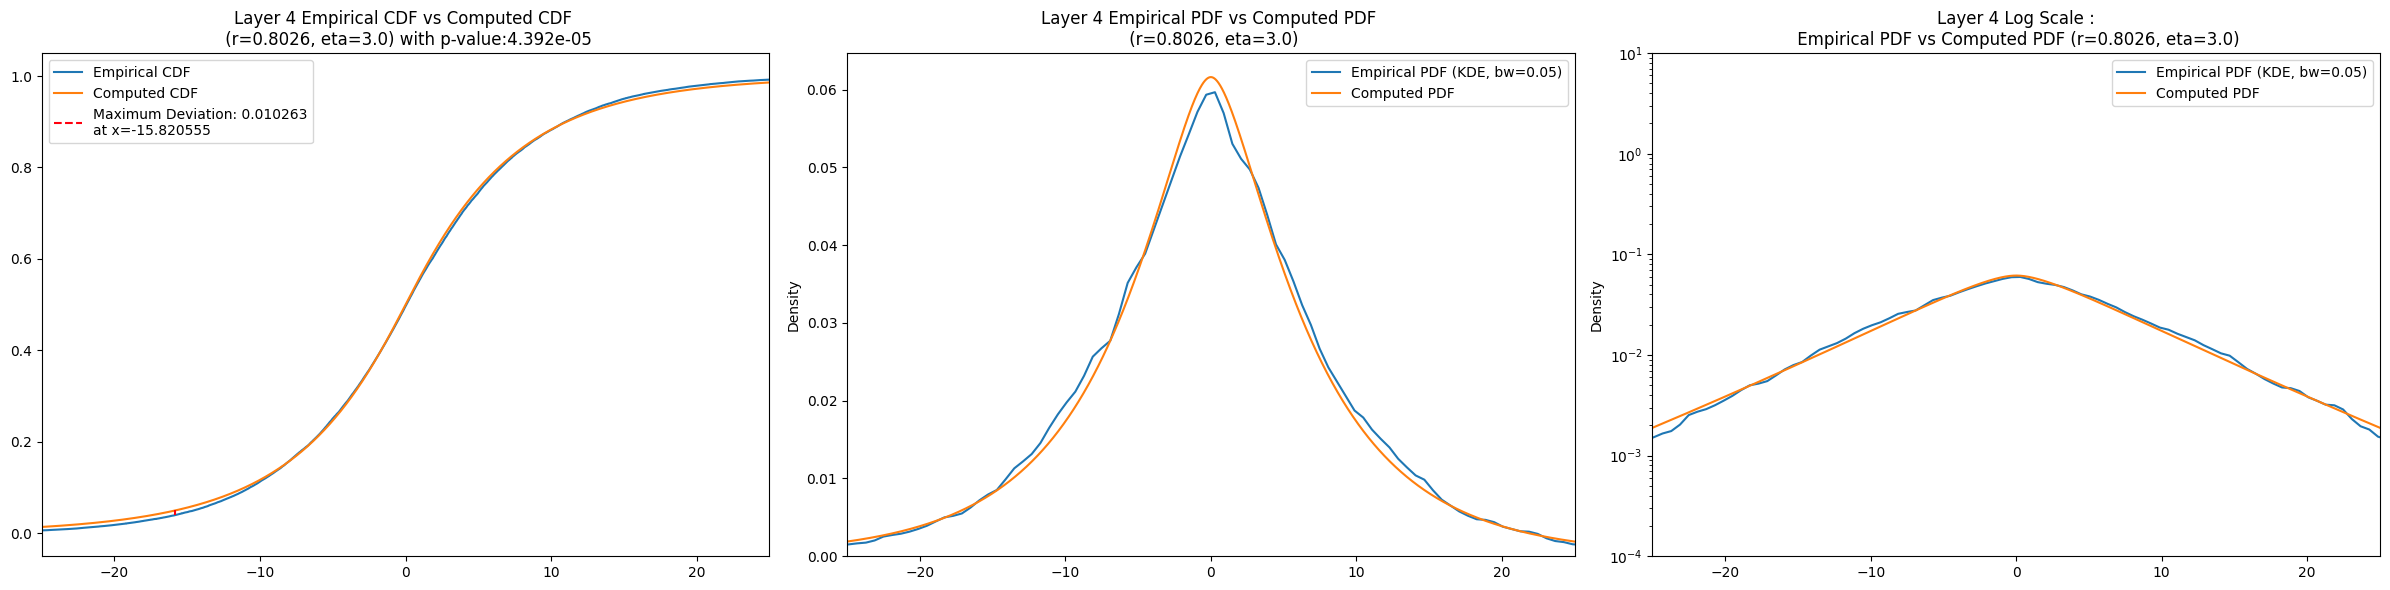

No Tail


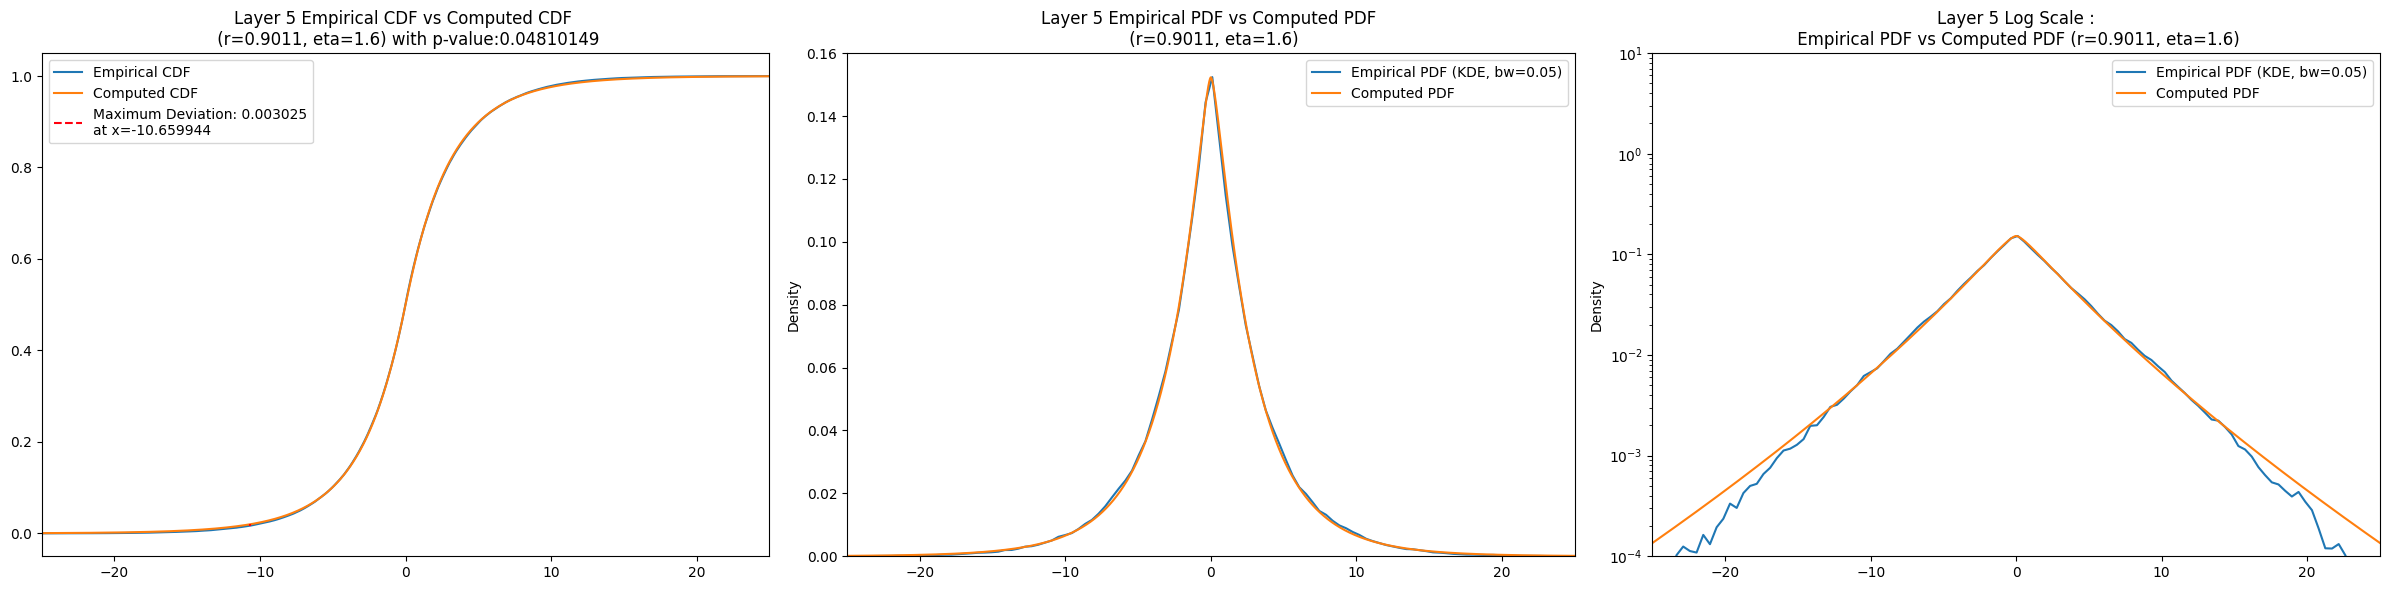

No Tail


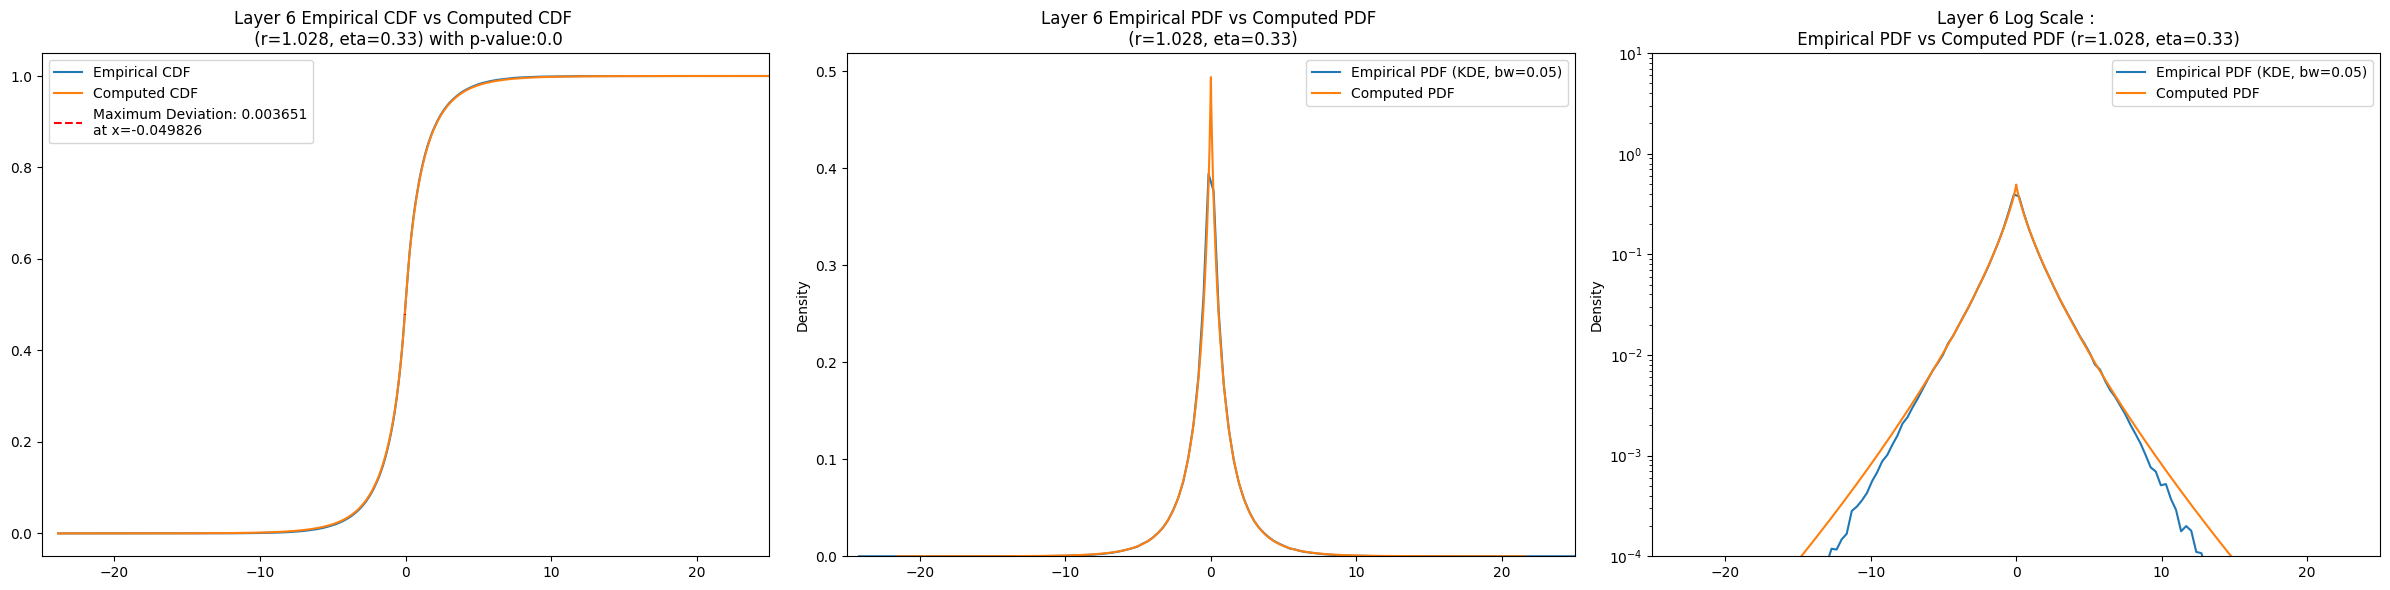

No Tail


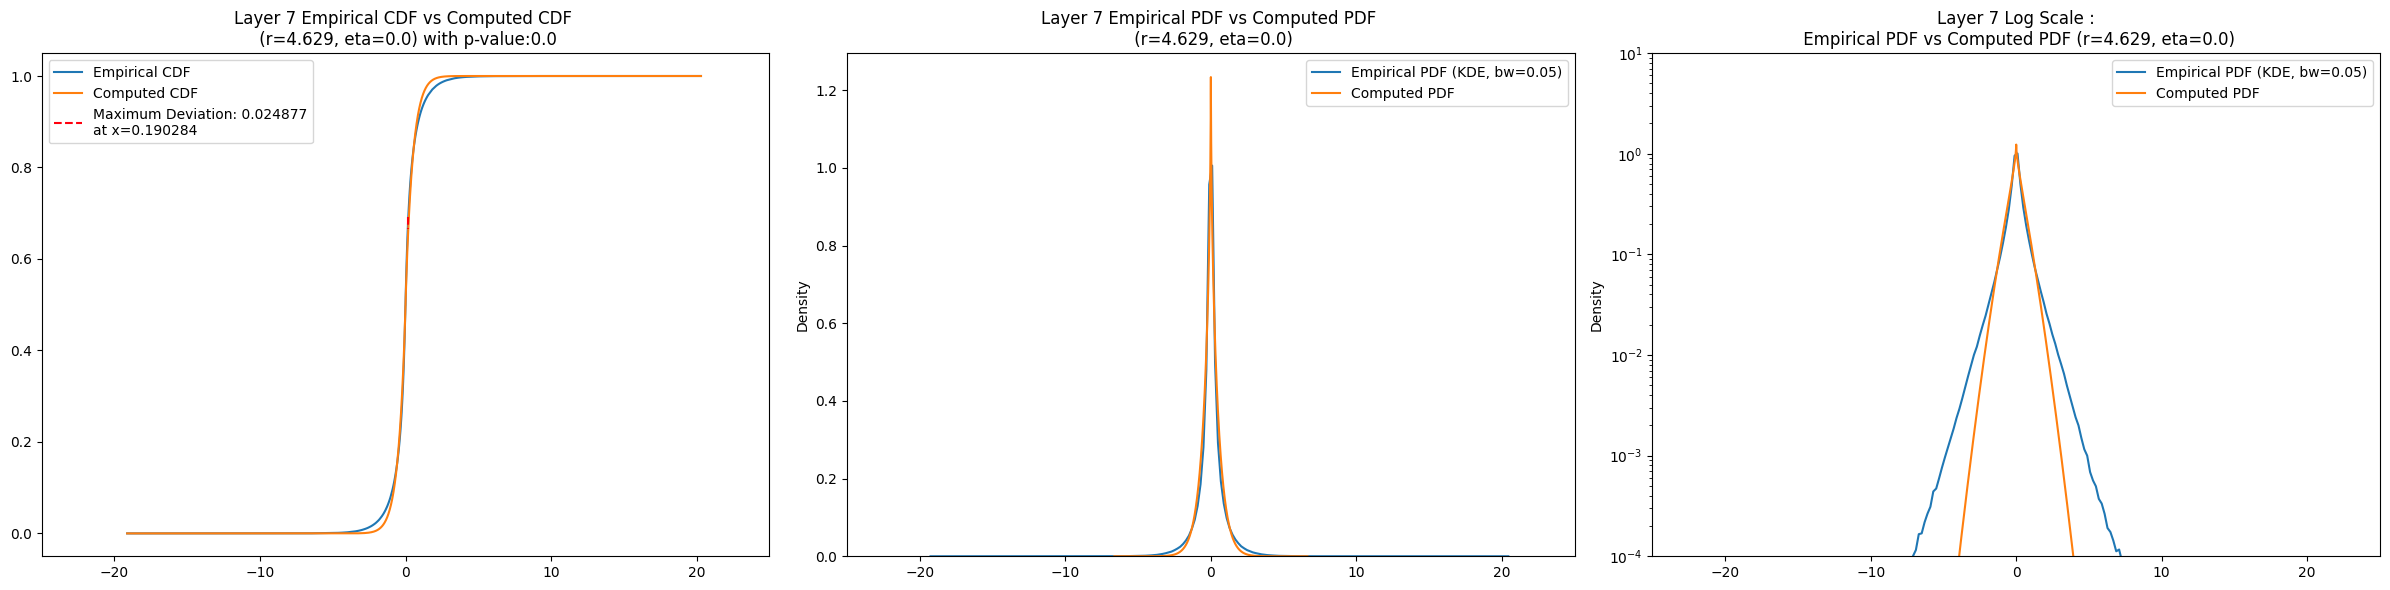

No Tail


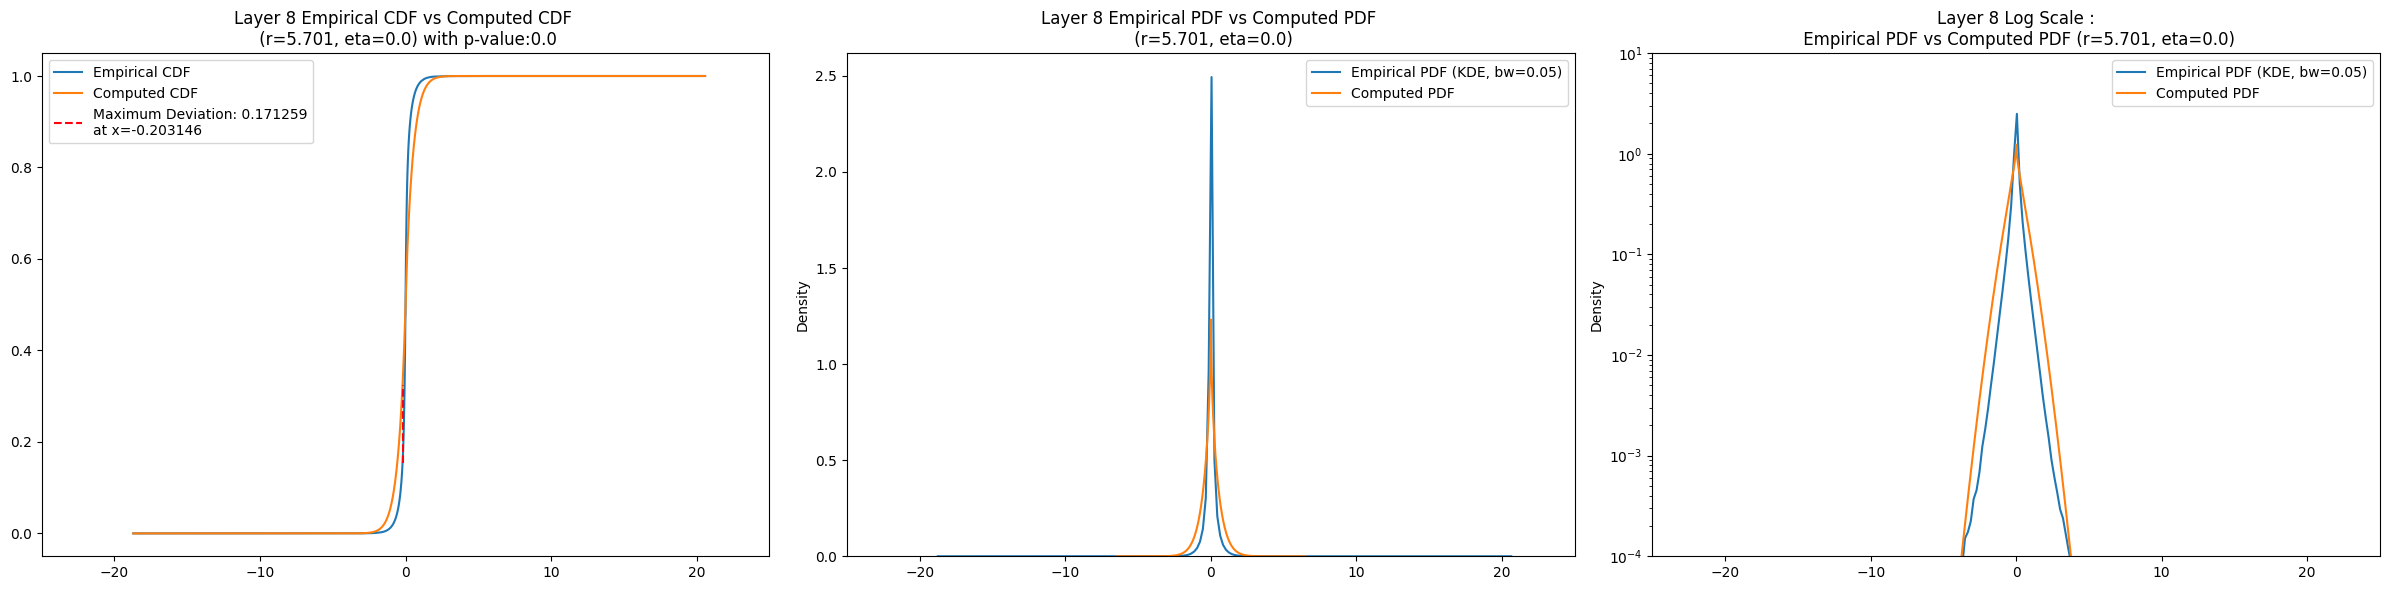

In [19]:
for layer in np.arange(2, 9):
    layer_info = master_df.loc[layer]
    fig = visualize_cdf_pdf(obs_x_dict[layer], 
                      params = (layer_info[f'best_r_d{r_d}'], layer_info[f'best_eta_d{eta_d}']), 
                      log_scale = True,
                      all_cdfs = combine_pickles(f'layer{layer}_10000'),
                      layer = layer)
    fig.savefig(f'panoptic/plots/compare_cdf_pdf_layer_{layer}.png', bbox_inches = 'tight')

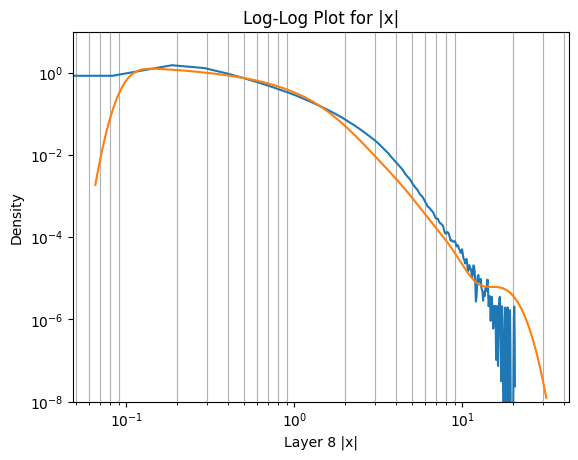

In [59]:
# Examining tails of higher layer PDFs
bw = 0.1
layer = 7
x = np.abs(obs_x_dict[layer])
fig = sns.kdeplot(x = x[x >= 0.1], bw_method = bw, label = f"Empirical PDF (KDE), bw={bw}")
fig.set_xscale('log')
fig.set_yscale('log')
fig.set_ylim(bottom = 10**-8, top=10)
plt.xlabel(f'Layer {layer} |x|')
plt.title(f'Log-Log Plot for |x|')
plt.grid(True, 'minor')


bw = 0.2
layer = 8
x = np.abs(obs_x_dict[layer])
fig = sns.kdeplot(x = x[x >= 0.1], bw_method = bw, label = f"Empirical PDF (KDE), bw={bw}")
fig.set_xscale('log')
fig.set_yscale('log')
fig.set_ylim(bottom = 10**-8, top=10)
plt.xlabel(f'Layer {layer} |x|')
plt.title(f'Log-Log Plot for |x|')
plt.grid(True, 'minor')

## Comparison Plots (CDF, PDF)

No Tail


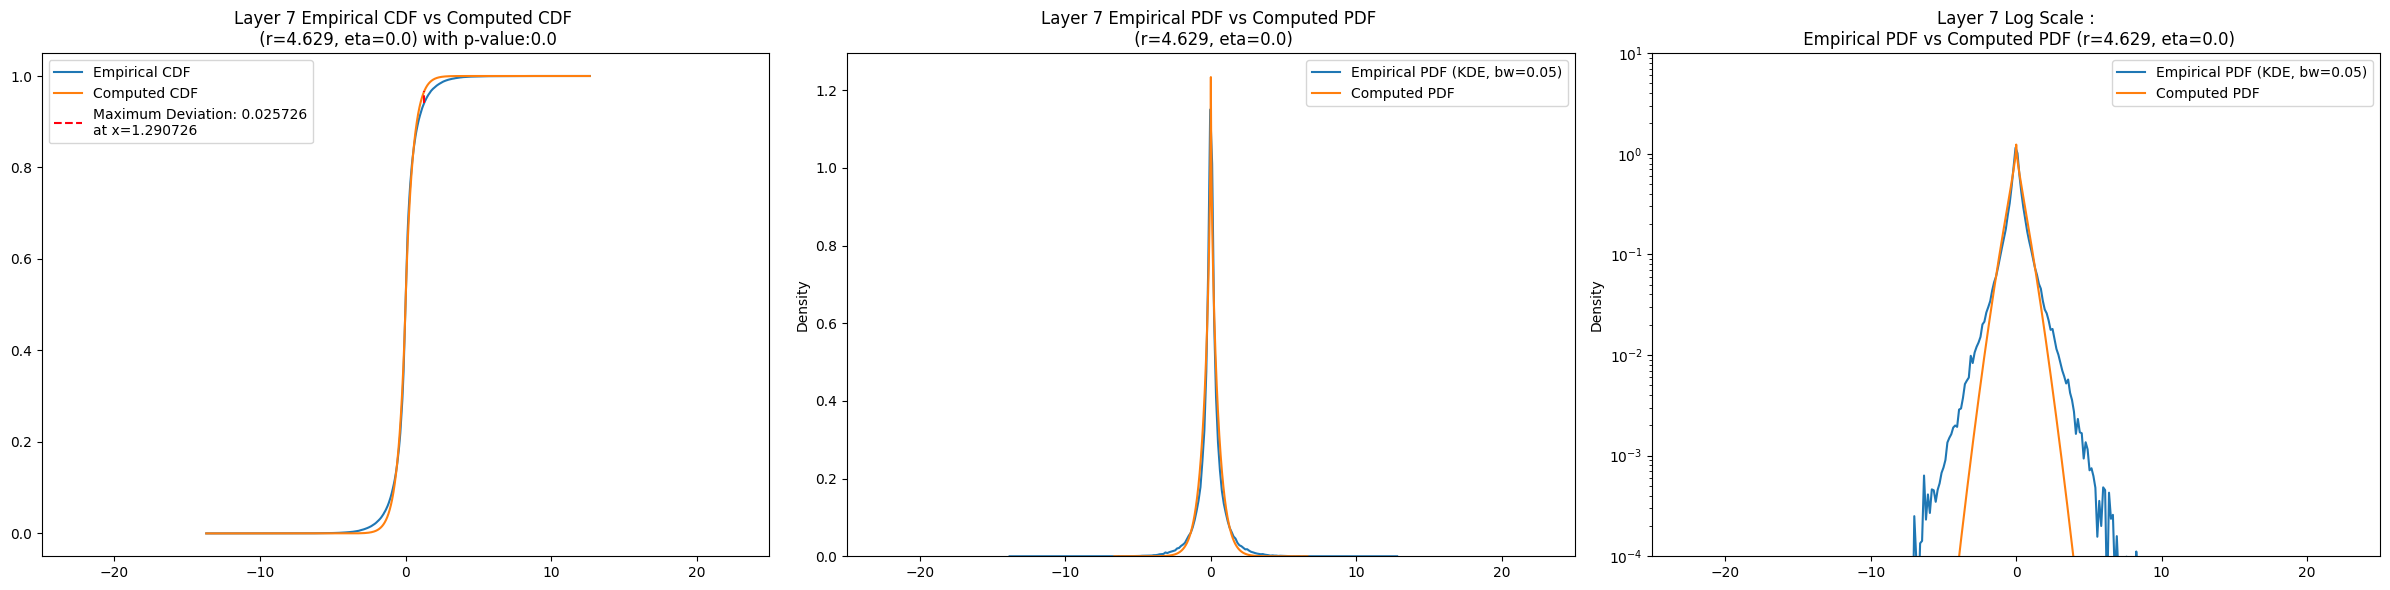

No Tail


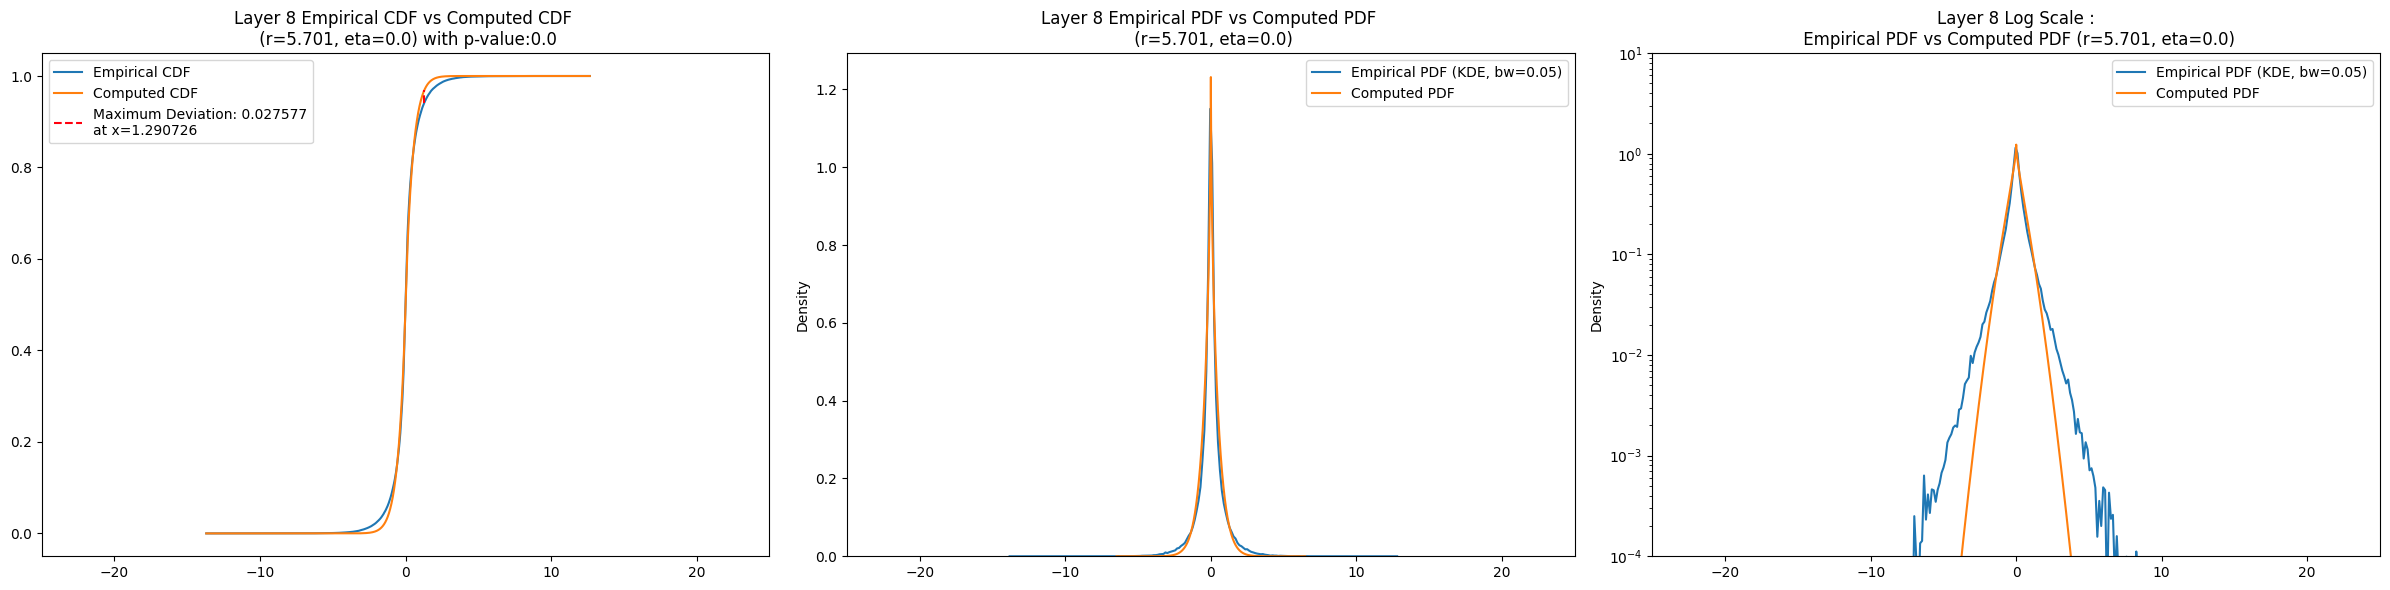

In [15]:
sample = obs_x_dict[7]
subsamp = sample[np.random.permutation(sample.size)]
for layer in np.arange(2, 9):
    layer_info = master_df.loc[layer]
    fig = visualize_cdf_pdf(subsamp, 
                      params = (layer_info[f'best_r_d{r_d}'], layer_info[f'best_eta_d{eta_d}']), 
                      log_scale = True,
                      all_cdfs = combine_pickles(f'layer{layer}_10000'),
                      layer = layer)

## Comparing with Gaussian and Laplace

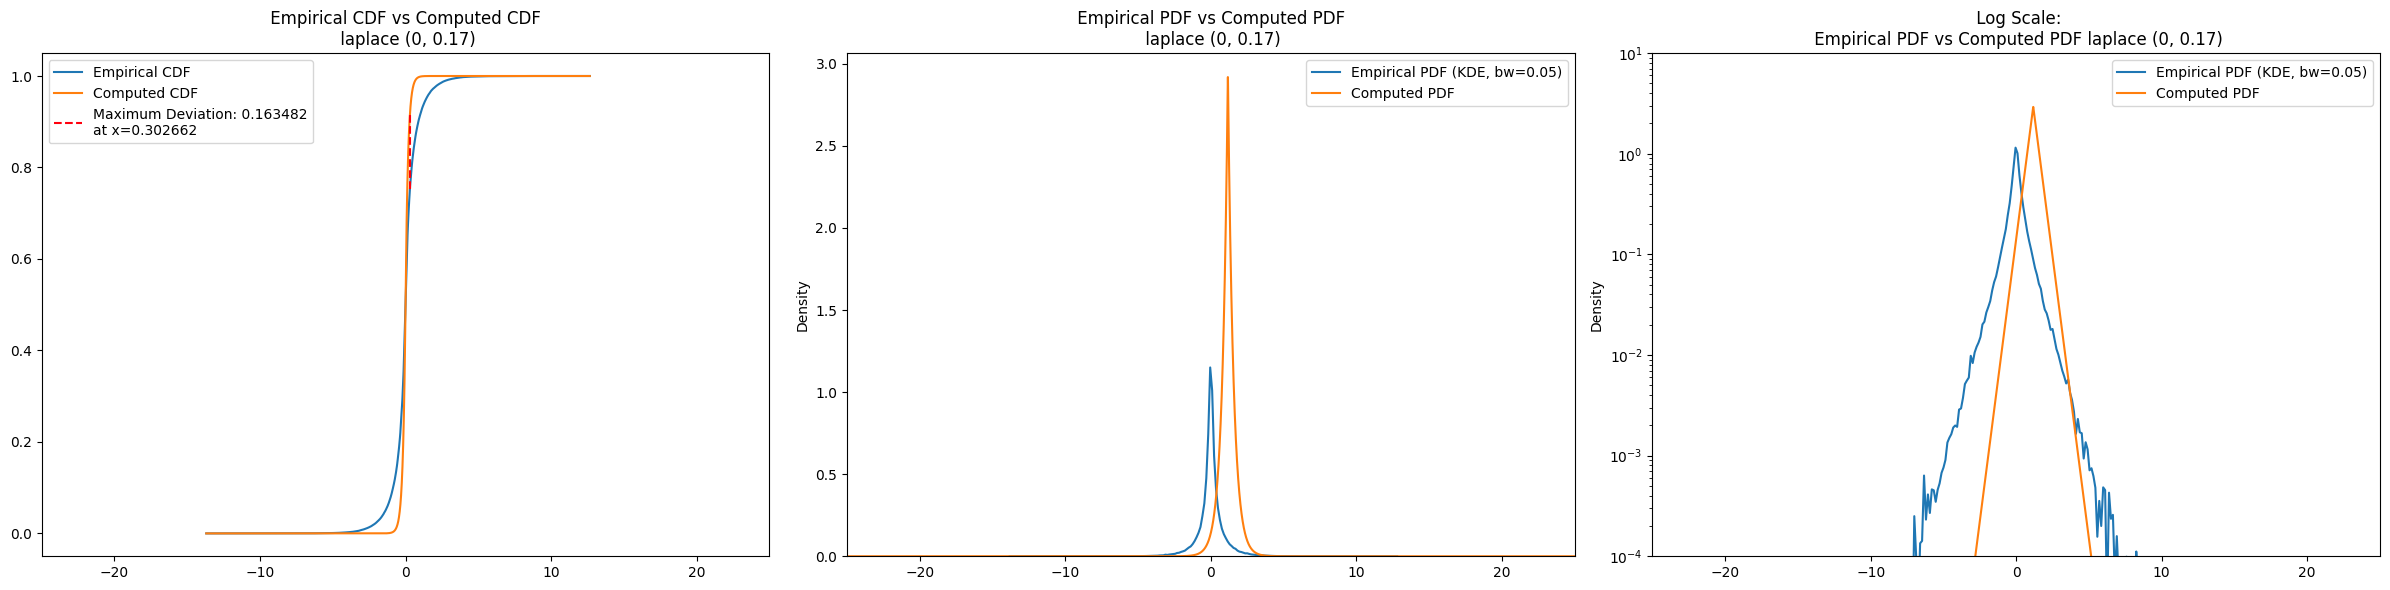

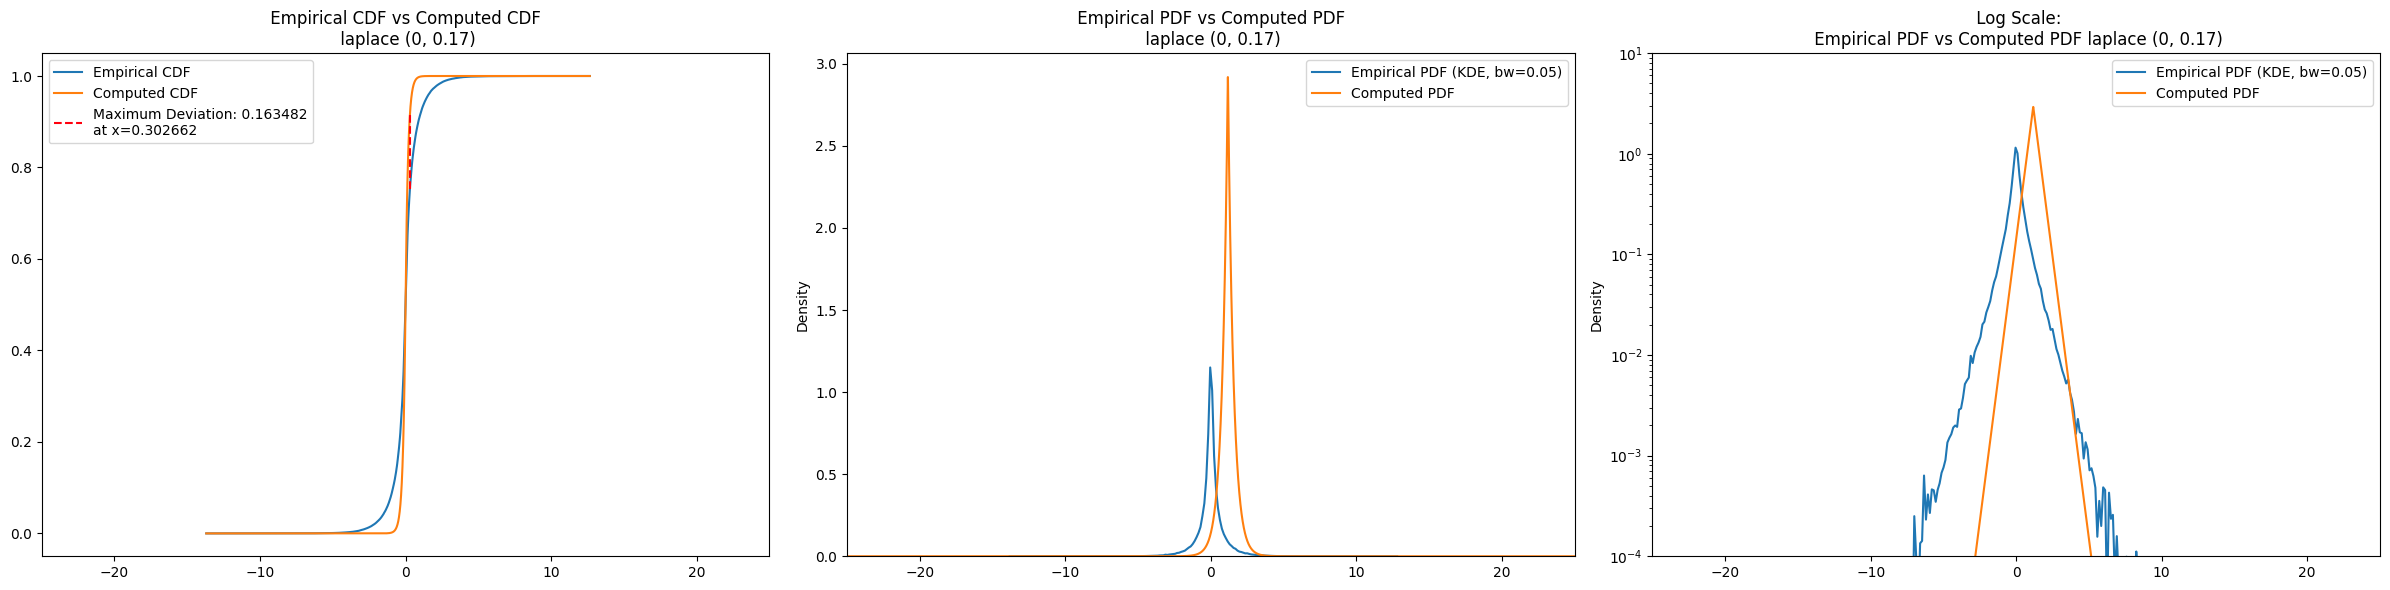

In [61]:
visualize_cdf_pdf(sample=subsamp, params = 0.17, distro='laplace')

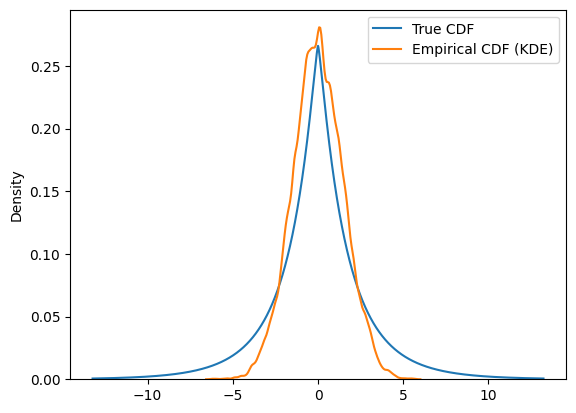

In [ ]:
# Note that this is with KDEs, subjective element with bandwidth parameter, but I think conveys the idea well
xs, pdf = compute_prior_pdf(1, 1)
cdf = all_cdfs[(1,1)]
plt.plot(xs, pdf, label = 'True CDF')
sns.kdeplot(sorted(scipy.stats.norm(scale=1.5).rvs(size=10000)), label = 'Empirical CDF (KDE)', bw_adjust = 0.5)

plt.legend()

In [26]:
def coord_descent_scipy(sample, initial_param):
    '''
    '''
    r_0, eta_0 = initial_param
    find_r_1 = scipy.optimize.minimize_scalar(generate_func(sample, 'gengamma_r', eta_0), method = 'bounded', bounds = (max(0.5, r_0-0.1), r_0+0.1))
    r_1 = find_r_1['x']
    find_eta_1 = scipy.optimize.minimize_scalar(generate_func(sample, 'gengamma_eta', r_1), method = 'bounded', bounds = (max(0, eta_0-0.1), eta_0+0.1))
    eta_1 = find_eta_1['x']
    find_r_2 = scipy.optimize.minimize_scalar(generate_func(sample, 'gengamma_r', eta_1), method = 'bounded', bounds = (max(0.5, r_1-0.1), r_1+0.1))

    r_2 = find_r_2['x']

    return r_2, eta_1, find_r_2['fun']

for layer in np.arange(2, 9):
    master_df.loc[layer, f'best_r_scipy'], master_df.loc[layer, f'best_eta_scipy'], master_df.loc[layer, f'kstest_stat_cd_scipy'] = coord_descent_scipy(obs_x_dict[layer], master_df.loc[layer, 'initial_param'])


0.576393202250021 3.2
0.623606797749979 3.2
0.652786404500042 3.2
No Tail
0.6031885922970331 3.2


KeyboardInterrupt: 

In [29]:
master_df

,num_samples,initial_param,kstest_stat_initial,best_param_eta_0,kstest_stat_eta_0,kstest_stat_cutoff_0.05,best_r_d3,best_eta_d2,kstest_stat_cd,n_pval_0.05,best_r_d4
layer,,,,,,,,,,,
2,3180,"(0.6, 3.2)",0.038340,"(0.4, 0)",0.102709,0.024030,0.602,3.20,0.036033,1341,0.6020
3,12720,"(0.7, 3.5)",0.020230,"(0.4, 0)",0.106739,0.012029,0.705,3.60,0.019689,4770,0.7048
4,50880,"(0.8, 3.0)",0.011666,"(0.5, 0)",0.061078,0.006018,0.803,3.00,0.010263,16098,0.8026
5,203520,"(0.9, 1.6)",0.003225,"(0.6, 0)",0.040301,0.003010,0.901,1.60,0.003025,203520,0.9011
6,814080,"(1.1, 0.5)",0.006844,"(0.9, 0)",0.014370,0.001505,1.030,0.33,0.003651,128142,1.0280
7,3256320,"(4.6, 0.0)",0.024895,"(4.6, 0)",0.024895,0.000753,4.630,0.00,0.024877,3016,4.6290
8,13025280,"(5.7, 0.0)",0.171259,"(5.7, 0)",0.171259,0.000376,5.700,0.00,0.171259,60,5.7010


In [45]:
for layer in np.arange(2, 9):
    norm_result = scipy.optimize.minimize_scalar(generate_func(obs_x_dict[layer], 'gaussian'), method = 'bounded', bounds = (0, 50))
    laplace_result = scipy.optimize.minimize_scalar(generate_func(obs_x_dict[layer], 'laplace'), method = 'bounded', bounds = (0, 50))
    
    master_df.loc[layer, 'param_gaussian'] = round_to_sigfigs(norm_result['x'], 6)
    master_df.loc[layer, 'kstest_stat_gaussian'] = round_to_sigfigs(norm_result['fun'], 6)
    master_df.loc[layer, 'kstest_pval_gaussian'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[layer, 'num_samples']).sf(master_df.loc[layer, 'kstest_stat_gaussian']), 6)

    master_df.loc[layer, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
    master_df.loc[layer, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
    master_df.loc[layer, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[layer, 'num_samples']).sf(master_df.loc[layer, 'kstest_stat_laplace']), 6)

    master_df.loc[layer, 'kstest_pval_gengamma'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[layer, 'num_samples']).sf(min(master_df.loc[layer, 'kstest_stat_cd'], master_df.loc[layer, 'kstest_stat_cd_scipy'])), 6)

master_df.to_csv(f'panoptic/CSVs/master_df.csv')
master_df = pd.read_csv('panoptic/CSVs/master_df.csv', index_col = 'layer')
master_df

,num_samples,initial_param,kstest_stat_initial,best_param_eta_0,kstest_stat_eta_0,kstest_stat_cutoff_0.05,best_r_d3,best_eta_d2,kstest_stat_cd,n_pval_0.05,...,best_eta_scipy,kstest_stat_cd_scipy,param_gaussian,kstest_stat_gaussian,param_laplace,kstest_stat_laplace,best_r_d4,kstest_pval_gaussian,kstest_pval_laplace,kstest_pval_gengamma
layer,,,,,,,,,,,,,,,,,,,,,
2,3180,"(0.6, 3.2)",0.038340,"(0.4, 0)",0.102709,0.024030,0.602,3.20,0.036033,1341,...,3.199999,0.035572,27.782300,0.019503,25.439100,0.036392,0.6020,1.755550e-01,4.282210e-04,6.236650e-04
3,12720,"(0.7, 3.5)",0.020230,"(0.4, 0)",0.106739,0.012029,0.705,3.60,0.019689,4770,...,3.499982,0.018549,16.031400,0.010128,14.012900,0.022665,0.7048,1.460870e-01,4.151010e-06,3.118640e-04
4,50880,"(0.8, 3.0)",0.011666,"(0.5, 0)",0.061078,0.006018,0.803,3.00,0.010263,16098,...,2.999992,0.009863,8.001070,0.020474,7.104980,0.014498,0.8026,5.852830e-19,1.017140e-09,9.980180e-05
5,203520,"(0.9, 1.6)",0.003225,"(0.6, 0)",0.040301,0.003010,0.901,1.60,0.003025,203520,...,1.600006,0.003011,3.590120,0.030175,3.138820,0.002343,0.9011,2.012920e-161,2.134870e-01,4.987300e-02
6,814080,"(1.1, 0.5)",0.006844,"(0.9, 0)",0.014370,0.001505,1.030,0.33,0.003651,128142,...,0.500005,0.005470,1.426170,0.042370,1.246790,0.014477,1.0280,0.000000e+00,1.233750e-148,7.517230e-10
7,3256320,"(4.6, 0.0)",0.024895,"(4.6, 0)",0.024895,0.000753,4.630,0.00,0.024877,3016,...,0.002368,0.024973,0.539642,0.052925,0.472750,0.025277,4.6290,0.000000e+00,0.000000e+00,0.000000e+00
8,13025280,"(5.7, 0.0)",0.171259,"(5.7, 0)",0.171259,0.000376,5.700,0.00,0.171259,60,...,0.000007,0.171067,0.196018,0.056353,0.172564,0.029150,5.7010,0.000000e+00,0.000000e+00,0.000000e+00


In [60]:
#master_df.filter(regex='num_samples|kstest_stat.*')
# master_df.filter(regex='num_samples|best.*')
# master_df.filter(regex='.*gaussian')
master_df#.filter(regex='kstest_pval.*')

,num_samples,initial_param,kstest_stat_initial,best_param_eta_0,kstest_stat_eta_0,kstest_stat_cutoff_0.05,best_r_d3,best_eta_d2,kstest_stat_cd,n_pval_0.05,...,best_eta_scipy,kstest_stat_cd_scipy,param_gaussian,kstest_stat_gaussian,param_laplace,kstest_stat_laplace,best_r_d4,kstest_pval_gaussian,kstest_pval_laplace,kstest_pval_gengamma
layer,,,,,,,,,,,,,,,,,,,,,
2,3180,"(0.6, 3.2)",0.038340,"(0.4, 0)",0.102709,0.024030,0.602,3.20,0.036033,1341,...,3.199999,0.035572,27.782300,0.019503,25.439100,0.036392,0.6020,1.755550e-01,4.282210e-04,6.236650e-04
3,12720,"(0.7, 3.5)",0.020230,"(0.4, 0)",0.106739,0.012029,0.705,3.60,0.019689,4770,...,3.499982,0.018549,16.031400,0.010128,14.012900,0.022665,0.7048,1.460870e-01,4.151010e-06,3.118640e-04
4,50880,"(0.8, 3.0)",0.011666,"(0.5, 0)",0.061078,0.006018,0.803,3.00,0.010263,16098,...,2.999992,0.009863,8.001070,0.020474,7.104980,0.014498,0.8026,5.852830e-19,1.017140e-09,9.980180e-05
5,203520,"(0.9, 1.6)",0.003225,"(0.6, 0)",0.040301,0.003010,0.901,1.60,0.003025,203520,...,1.600006,0.003011,3.590120,0.030175,3.138820,0.002343,0.9011,2.012920e-161,2.134870e-01,4.987300e-02
6,814080,"(1.1, 0.5)",0.006844,"(0.9, 0)",0.014370,0.001505,1.030,0.33,0.003651,128142,...,0.500005,0.005470,1.426170,0.042370,1.246790,0.014477,1.0280,0.000000e+00,1.233750e-148,7.517230e-10
7,3256320,"(4.6, 0.0)",0.024895,"(4.6, 0)",0.024895,0.000753,4.630,0.00,0.024877,3016,...,0.002368,0.024973,0.539642,0.052925,0.472750,0.025277,4.6290,0.000000e+00,0.000000e+00,0.000000e+00
8,13025280,"(5.7, 0.0)",0.171259,"(5.7, 0)",0.171259,0.000376,5.700,0.00,0.171259,60,...,0.000007,0.171067,0.196018,0.056353,0.172564,0.029150,5.7010,0.000000e+00,0.000000e+00,0.000000e+00


200

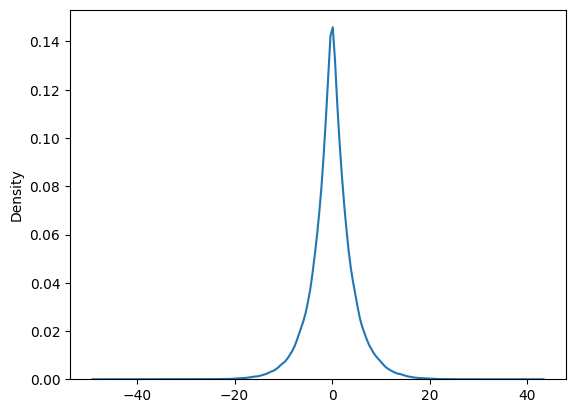

In [82]:
x,y = sns.kdeplot(obs_x_dict[5]).lines[0].get_data()
len(x)

In [ ]:
%%time
# Creates validation dataframes 
# For now, it caps out at 6. For layer 7 and up it just defaults to 2.9, 0

# for layer in range(6, 8):
#     obs_x = create_obs_x(data_dict, layer)
#     df = make_layer_df(obs_x, all_cdfs_df)
#     total_samples = obs_x.size
#     all_num_samples = np.sort(np.append(5*10**np.arange(3.0, np.floor(np.log10(total_samples))), 10**np.arange(3.0, np.ceil(np.log10(total_samples)))))
#     print(list(all_num_samples))
#     np.random.seed(42)
#     x = obs_x[np.random.permutation(total_samples)]
#     val_df = pd.concat([val_df_fixed_num(x, n, all_cdfs_df) for n in all_num_samples])
#     val_df.to_csv(f'panoptic/CSVs/val_df{layer}_{cdfs_name}.csv')
#     val_df.value_counts(['r', 'eta'])

In [ ]:
val_df = pd.read_csv(f'panoptic/CSVs/val_df{4}.csv', index_col='Unnamed: 0')
print(val_df.value_counts(['r', 'eta'])[:10])

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # Create a figure with two subplots

for layer in np.arange(layer, layer+1):
    #obs_x = obs_x_dict[layer]
    #df = df_dict[layer]
    total_samples = obs_x.size
    x = obs_x[np.random.permutation(total_samples)]
    val_df = pd.read_csv(f'panoptic/CSVs/val_df{layer}_{cdfs_name}.csv', index_col='Unnamed: 0')

    # Scatter plot
    sns.scatterplot(val_df.drop(['kstest_stat', 'kstest_pval'], axis=1), x='r', y='eta', palette='bright', hue='num_samples', alpha=0.4, ax=ax1)
    r, eta = best_params_df.loc[layer]['r'], best_params_df.loc[layer]['eta']
    ax1.scatter(x=r, y=eta, marker="*", label='all_data', s=60, color='xkcd:shamrock green', alpha=0.7)
    ax1.set_title(f'KS-Test Statistic minimizing parameters for subsets of layer {layer} data')
    print(r, eta)
    ax1.legend()

    # KDE plot
    sns.kdeplot(val_df.drop(['kstest_stat', 'kstest_pval'], axis=1), x='r', y='eta', palette='bright', hue='num_samples', alpha=0.4, ax=ax2)

plt.tight_layout()
plt.show()

In [ ]:
np.random.seed(42)

# TODO: Put plots side by side
for layer in np.arange(layer, layer+1):
    obs_x = obs_x_dict[layer]
    df = df_dict[layer]
    total_samples = obs_x.size
    x = obs_x[np.random.permutation(total_samples)]
    val_df = pd.read_csv(f'panoptic/CSVs/val_df{layer}.csv', index_col='Unnamed: 0')
    sns.scatterplot(val_df.drop(['kstest_stat', 'kstest_pval'], axis = 1), x = 'r', y = 'eta', palette = 'bright', hue = 'num_samples', alpha = 0.4)
    r, eta, = best_params_df.loc[layer]['r'], best_params_df.loc[layer]['eta']
    plt.scatter(x = r, y = eta, marker="*", label = 'all_data', s = 60, color = 'xkcd:shamrock green', alpha = 0.7)
    plt.title(f'KS-Test Statistic minimizing parameters for subsets of layer {layer} data')
    print(r, eta)
    plt.legend()
    
    sns.kdeplot(val_df.drop(['kstest_stat', 'kstest_pval'], axis = 1), x = 'r', y = 'eta', palette = 'bright', hue = 'num_samples', alpha = 0.4)
    

In [ ]:
layer = 6
val_df = pd.read_csv(f'panoptic/CSVs/val_df{layer}.csv', index_col='Unnamed: 0')
mask = val_df['num_samples'] == 100
sns.kdeplot(val_df.drop(['kstest_pval'], axis = 1)[mask], x = 'r', y = 'eta', fill=True)
r, eta, = best_params_df.loc[layer]['r'], best_params_df.loc[layer]['eta']
plt.scatter(x = r, y = eta, marker="*", label = 'all_data', s = 60, color = 'xkcd:shamrock green', alpha = 0.7)
plt.title('Validation')